In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate

In [2]:
train = pd.read_csv('/content/Train_data.csv')
test = pd.read_csv('/content/Test_data.csv')
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [3]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
train.shape

(25192, 42)

In [6]:
train.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


<Axes: xlabel='class', ylabel='count'>

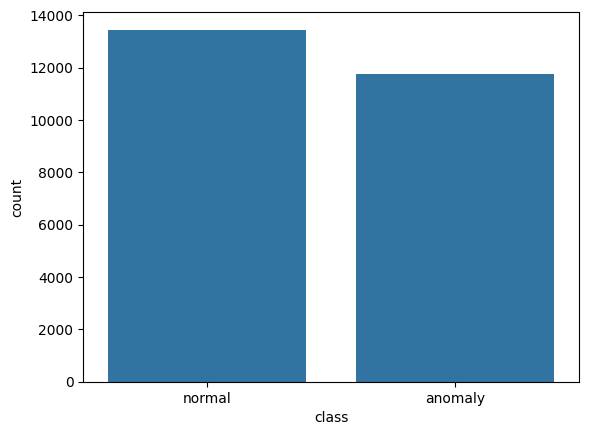

In [7]:
sns.countplot(x=train['class'])

In [8]:
train['class'].value_counts()

,count
class,
normal,13449
anomaly,11743


In [9]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])
le(train)
le(test)

In [10]:
# Verify the column name in 'train' DataFrame
print(train.columns)
# Verify the column name in 'test' DataFrame
print(test.columns)

# If the column name is present, proceed with the drop operation:
if 'num_outbound_cmds' in train.columns:
    train.drop(['num_outbound_cmds'], axis=1, inplace=True)
else:
    print("'num_outbound_cmds' column not found in 'train' DataFrame.")

if 'num_outbound_cmds' in test.columns:
    test.drop(['num_outbound_cmds'], axis=1, inplace=True)
else:
    print("'num_outbound_cmds' column not found in 'test' DataFrame.")

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')
Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed

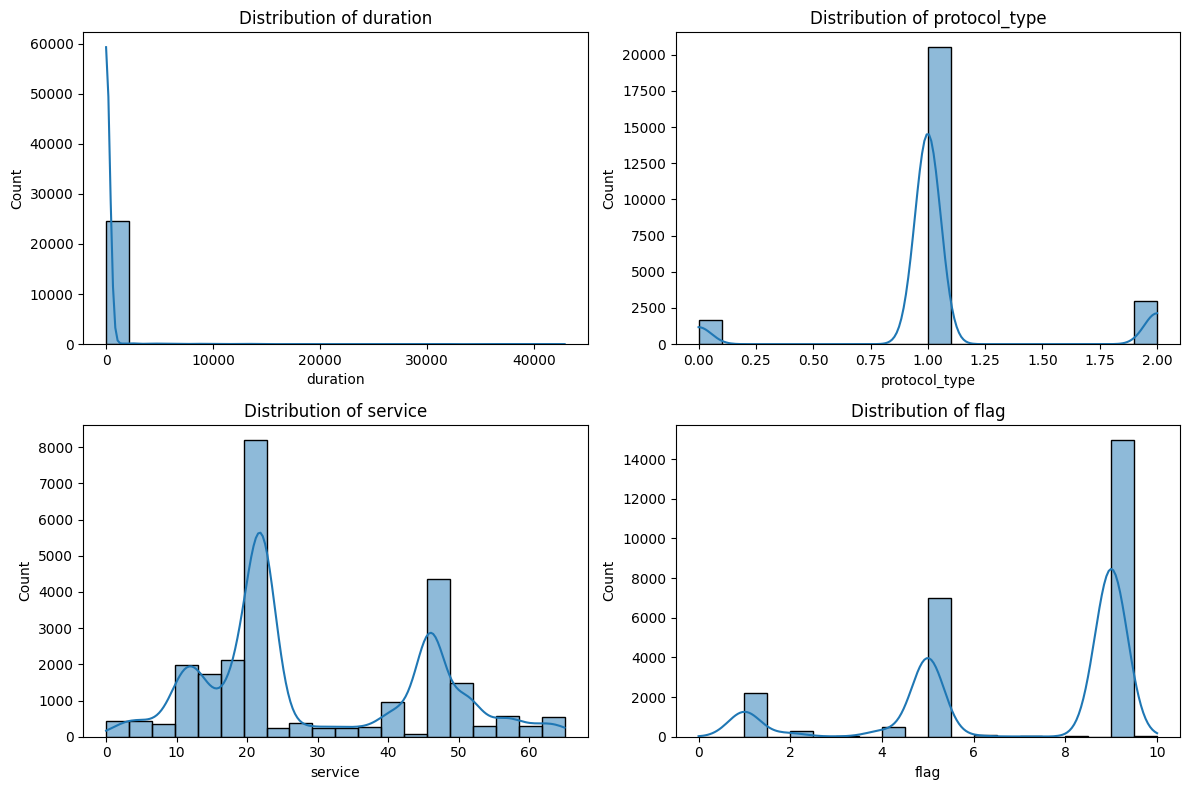

In [14]:
import math

# Selecting a subset of numeric features (3-4 features)
subset_features = train.select_dtypes(include=np.number).columns[:4]

# Calculate grid dimensions
num_features = len(subset_features)
num_cols = 2 # Or any desired number of columns
num_rows = math.ceil(num_features / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(6 * num_cols, 4 * num_rows))
axes = axes.flatten() # Flatten the array of axes for easy iteration

# Distribution of selected numeric features in a grid
for i, col in enumerate(subset_features):
    sns.histplot(train[col], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

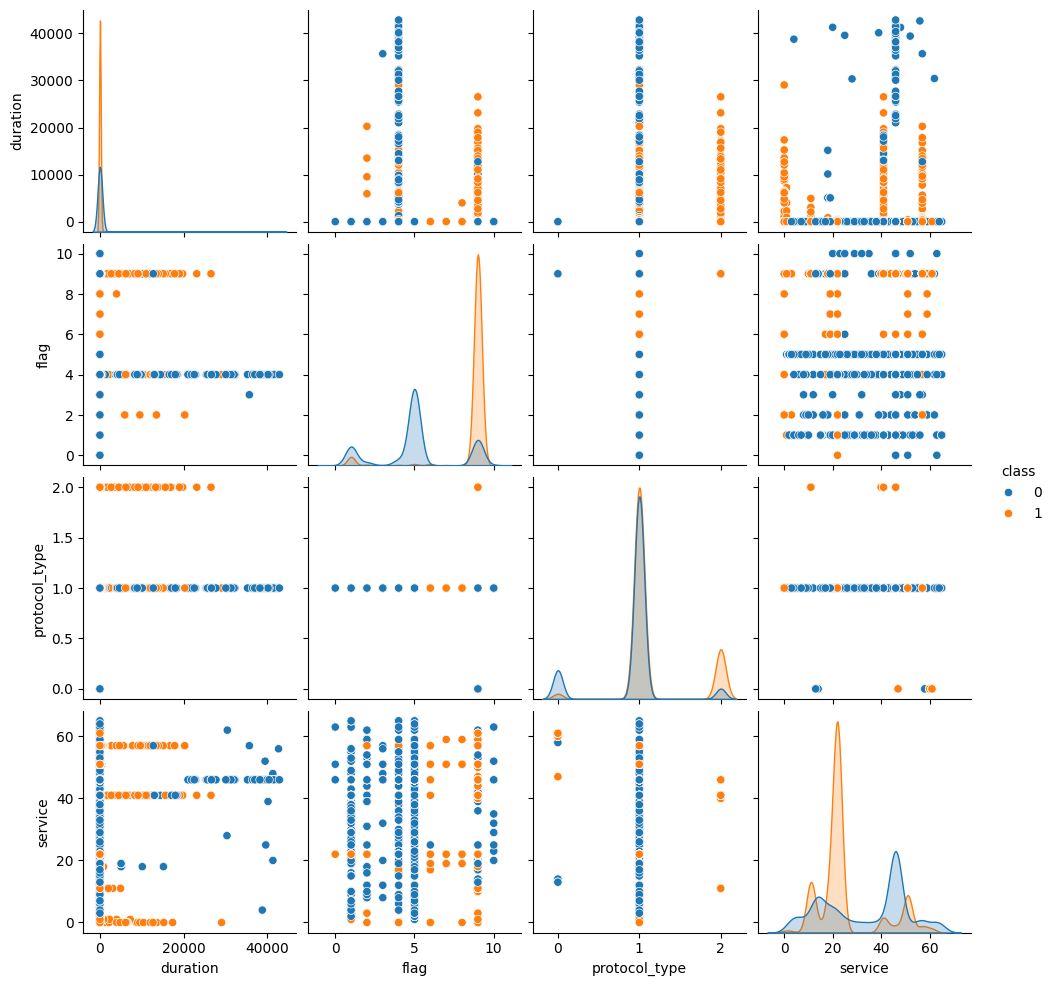

In [13]:
# Pairplot for selected features
sns.pairplot(train[subset_features.union(['class'])], hue='class', diag_kind='kde')
plt.show()

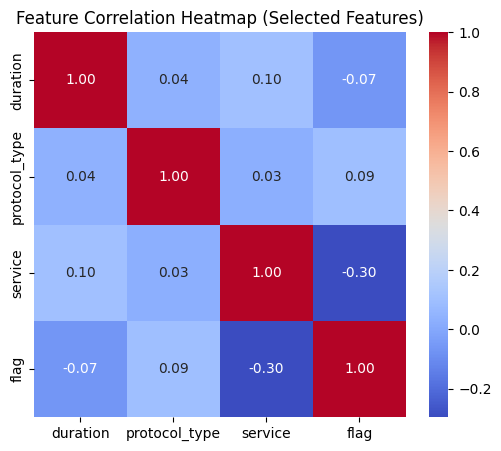

In [12]:
# Heatmap of correlations for selected features
plt.figure(figsize=(6, 5))
sns.heatmap(train[subset_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap (Selected Features)')
plt.show()

In [15]:
X_train = train.drop(['class'], axis=1)
Y_train = train['class']

In [16]:
rfc = RandomForestClassifier()
rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]
selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate']

In [17]:
X_train = X_train[selected_features]

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)
x_train.shape
x_test.shape

(7558, 10)

# **K-Nearest Neighbor**

In [18]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 25, metric = 'minkowski')
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [19]:
knn_y_pred = knn.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,knn_y_pred)

0.9797565493516803

In [20]:
error_rate = 1.0 - metrics.accuracy_score(y_test,knn_y_pred)
print("Error Rate:", error_rate)

Error Rate: 0.020243450648319672


In [21]:
sensitivity = metrics.recall_score(y_test,knn_y_pred,average='weighted')
print("Sensitivity:", sensitivity)

Sensitivity: 0.9797565493516803


In [22]:
def calculate_specificity(y_true, knn_y_pred, class_label):
    true_negative = np.sum((y_true != class_label) & (knn_y_pred != class_label))
    false_positive = np.sum((y_true != class_label) & (knn_y_pred == class_label))
    specificity = true_negative / (true_negative + false_positive)
    return specificity
class_label = 0
specificity = calculate_specificity(y_test, knn_y_pred, class_label)
print("Specificity:", specificity)

Specificity: 0.9817733990147783


In [23]:
f1_score = metrics.f1_score(y_test,knn_y_pred,average='weighted')
print("F1-score", f1_score)

F1-score 0.9797555389944943


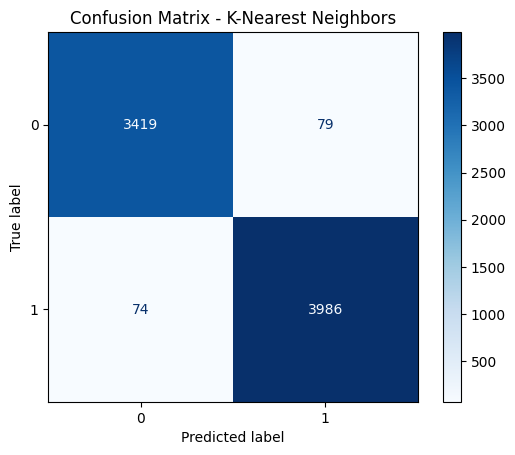


Classification Report - K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3498
           1       0.98      0.98      0.98      4060

    accuracy                           0.98      7558
   macro avg       0.98      0.98      0.98      7558
weighted avg       0.98      0.98      0.98      7558



In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def plot_confusion_matrix_and_classification_report(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    print(f"\nClassification Report - {model_name}")
    print(classification_report(y_true, y_pred))

# Example usage for K-Nearest Neighbors
plot_confusion_matrix_and_classification_report(y_test, knn_y_pred, "K-Nearest Neighbors")

# **Support Vector Machine**

In [28]:
from sklearn.svm import SVC
svc = SVC(kernel="linear",random_state=0)
svc.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [29]:
svc_y_pred = svc.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,svc_y_pred)

0.9350357237364382

In [30]:
error_rate = 1.0 - metrics.accuracy_score(y_test,svc_y_pred)
print("Error Rate:", error_rate)

Error Rate: 0.06496427626356183


In [31]:
sensitivity = metrics.recall_score(y_test,svc_y_pred,average='weighted')
print("Sensitivity:", sensitivity)

Sensitivity: 0.9350357237364382


In [32]:
def calculate_specificity(y_true, svc_y_pred, class_label):
    true_negative = np.sum((y_true != class_label) & (svc_y_pred != class_label))
    false_positive = np.sum((y_true != class_label) & (svc_y_pred == class_label))
    specificity = true_negative / (true_negative + false_positive)
    return specificity
class_label = 0
specificity = calculate_specificity(y_test, svc_y_pred, class_label)
print("Specificity:", specificity)

Specificity: 0.9605911330049262


In [33]:
f1_score = metrics.f1_score(y_test,knn_y_pred,average='weighted')
print("F1-score", f1_score)

F1-score 0.9797555389944943


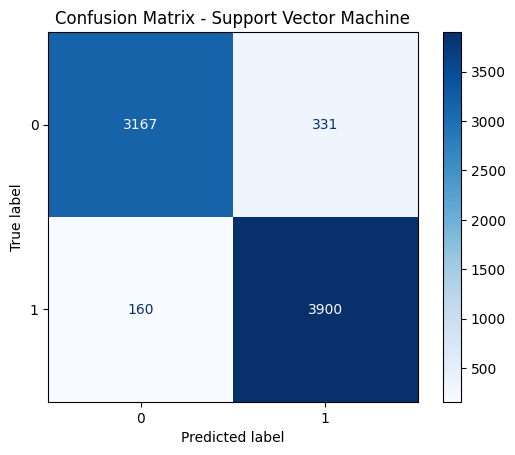


Classification Report - Support Vector Machine
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3498
           1       0.92      0.96      0.94      4060

    accuracy                           0.94      7558
   macro avg       0.94      0.93      0.93      7558
weighted avg       0.94      0.94      0.93      7558



In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def plot_confusion_matrix_and_classification_report(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    print(f"\nClassification Report - {model_name}")
    print(classification_report(y_true, y_pred))

# Example usage for Support Vector Machine (SVM)
plot_confusion_matrix_and_classification_report(y_test, svc_y_pred, "Support Vector Machine")

# **Logistic Regression**

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [36]:
y_pred = model.predict(x_test)
print('Accuracy of Logistic Regression is: ', model.score(x_test,y_test) * 100,'%')

Accuracy of Logistic Regression is:  94.21804710240804 %


In [37]:
error_rate = 1.0 - metrics.accuracy_score(y_test,y_pred)
print("Error Rate:", error_rate)

Error Rate: 0.057819528975919576


In [38]:
sensitivity = metrics.recall_score(y_test,y_pred,average='weighted')
print("Sensitivity:", sensitivity)

Sensitivity: 0.9421804710240804


In [40]:
def calculate_specificity(y_true, y_pred, class_label):
    true_negative = np.sum((y_true != class_label) & (y_pred != class_label))
    false_positive = np.sum((y_true != class_label) & (y_pred == class_label))
    specificity = true_negative / (true_negative + false_positive)
    return specificity
class_label = 0
specificity = calculate_specificity(y_test, y_pred, class_label)
print("Specificity:", specificity)

Specificity: 0.9650246305418719


In [41]:
f1_score = metrics.f1_score(y_test,y_pred,average='weighted')
print("F1-score", f1_score)

F1-score 0.9420687429126886


# **Gradient Boost**

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score
model = GradientBoostingClassifier()
model.fit(x_train,y_train)

GradientBoostingClassifier()

In [43]:
y_pred = model.predict(x_test)
print('Accuracy of Gradient Boost is: ', model.score(x_test,y_test) * 100,'%')

Accuracy of Gradient Boost is:  99.35168033871395 %


In [44]:
error_rate = 1.0 - metrics.accuracy_score(y_test,y_pred)
print("Error Rate:", error_rate)

Error Rate: 0.0064831966128605645


In [45]:
sensitivity = metrics.recall_score(y_test,y_pred,average='weighted')
print("Sensitivity:", sensitivity)

Sensitivity: 0.9935168033871394


In [46]:
def calculate_specificity(y_true, y_pred, class_label):
    true_negative = np.sum((y_true != class_label) & (y_pred != class_label))
    false_positive = np.sum((y_true != class_label) & (y_pred == class_label))
    specificity = true_negative / (true_negative + false_positive)
    return specificity
class_label = 0
specificity = calculate_specificity(y_test, y_pred, class_label)
print("Specificity:", specificity)

Specificity: 0.9933497536945812


In [47]:
f1_score = metrics.f1_score(y_test,y_pred,average='weighted')
print("F1-score", f1_score)

F1-score 0.9935171211958456


# **Random Forest**

In [48]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [49]:
clf_y_pred = clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,clf_y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9966922466260916


In [50]:
error_rate = 1.0 - metrics.accuracy_score(y_test,clf_y_pred)
print("Error Rate:", error_rate)

Error Rate: 0.0033077533739084286


In [51]:
sensitivity = metrics.recall_score(y_test,clf_y_pred,average='weighted')
print("Sensitivity:", sensitivity)

Sensitivity: 0.9966922466260916


In [52]:
def calculate_specificity(y_true, clf_y_pred, class_label):
    true_negative = np.sum((y_true != class_label) & (clf_y_pred != class_label))
    false_positive = np.sum((y_true != class_label) & (clf_y_pred == class_label))
    specificity = true_negative / (true_negative + false_positive)
    return specificity
class_label = 0
specificity = calculate_specificity(y_test, clf_y_pred, class_label)
print("Specificity:", specificity)

Specificity: 0.9970443349753695


In [53]:
f1_score = metrics.f1_score(y_test,clf_y_pred,average='weighted')
print("F1-score", f1_score)

F1-score 0.9966922138434241


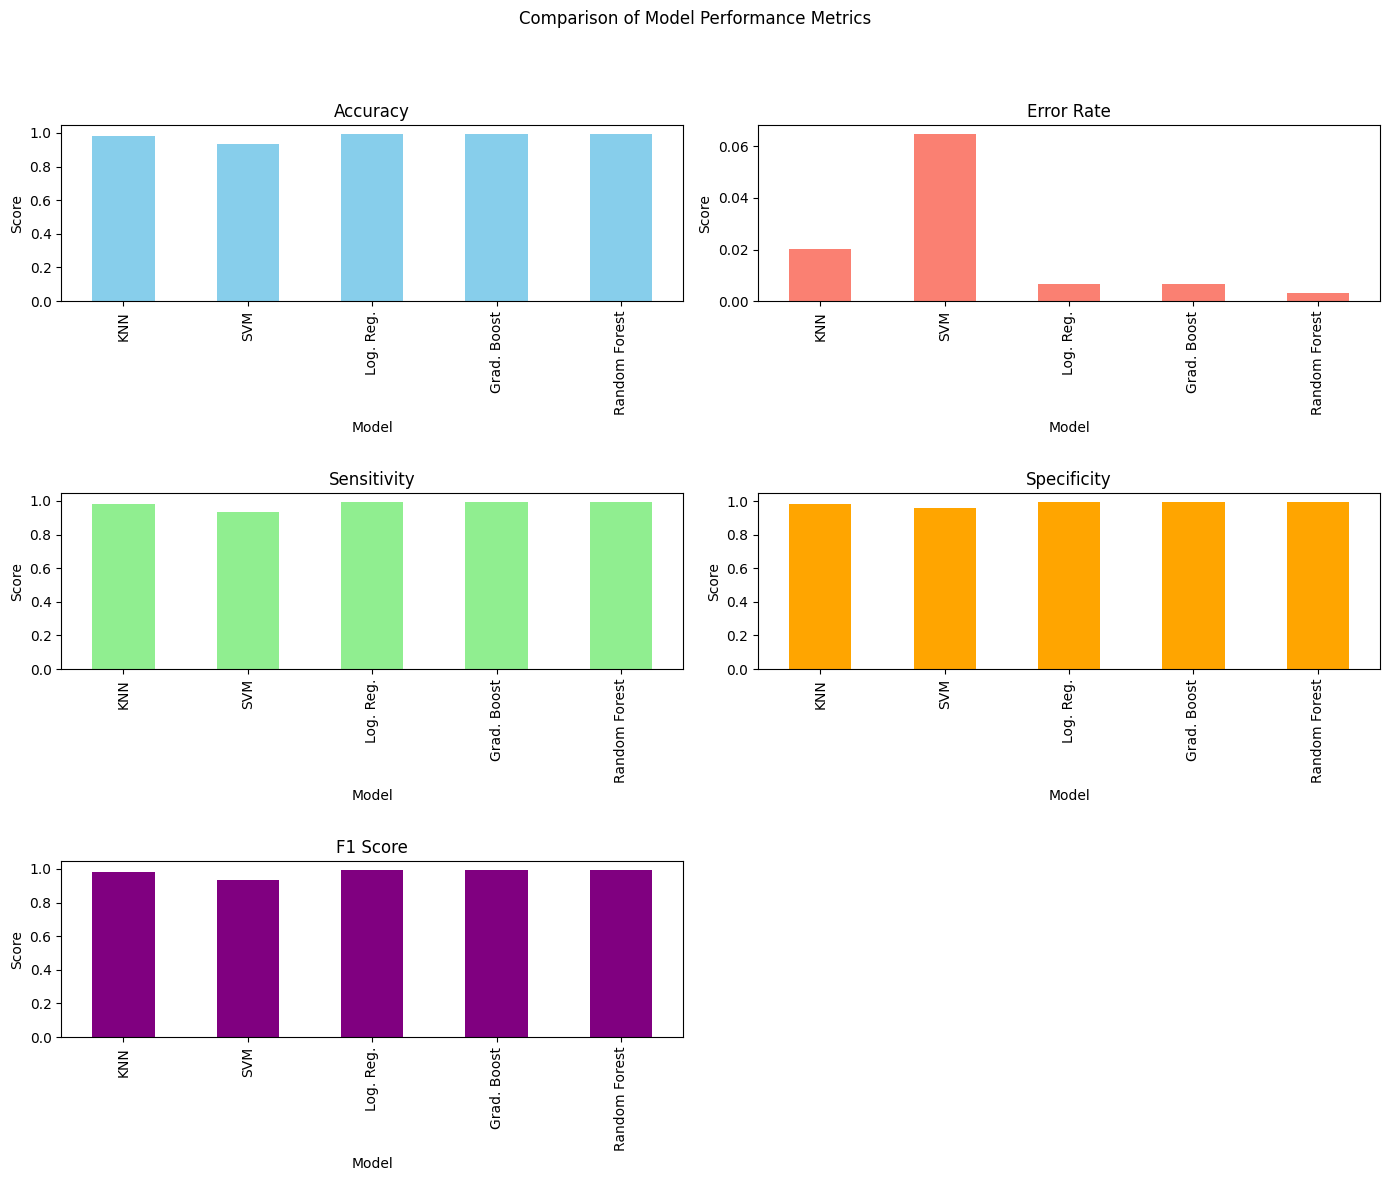

In [60]:
# Define a function to calculate model metrics
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    error_rate = 1.0 - accuracy
    sensitivity = metrics.recall_score(y_true, y_pred, average='weighted')
    f1 = metrics.f1_score(y_true, y_pred, average='weighted')
    specificity = calculate_specificity(y_true, y_pred, class_label=0)  # Assuming 0 is a class label
    return accuracy, error_rate, sensitivity, specificity, f1

# Calculate metrics for each model
metrics_data = {
    'Model': ['KNN', 'SVM', 'Log. Reg.', 'Grad. Boost', 'Random Forest'],
    'Accuracy': [],
    'Error Rate': [],
    'Sensitivity': [],
    'Specificity': [],
    'F1-score': []
}

# KNN metrics
knn_metrics = calculate_metrics(y_test, knn_y_pred)
metrics_data['Accuracy'].append(knn_metrics[0])
metrics_data['Error Rate'].append(knn_metrics[1])
metrics_data['Sensitivity'].append(knn_metrics[2])
metrics_data['Specificity'].append(knn_metrics[3])
metrics_data['F1-score'].append(knn_metrics[4])

# SVM metrics
svm_metrics = calculate_metrics(y_test, svc_y_pred)
metrics_data['Accuracy'].append(svm_metrics[0])
metrics_data['Error Rate'].append(svm_metrics[1])
metrics_data['Sensitivity'].append(svm_metrics[2])
metrics_data['Specificity'].append(svm_metrics[3])
metrics_data['F1-score'].append(svm_metrics[4])

# Logistic Regression metrics
lr_metrics = calculate_metrics(y_test, y_pred)
metrics_data['Accuracy'].append(lr_metrics[0])
metrics_data['Error Rate'].append(lr_metrics[1])
metrics_data['Sensitivity'].append(lr_metrics[2])
metrics_data['Specificity'].append(lr_metrics[3])
metrics_data['F1-score'].append(lr_metrics[4])

# Gradient Boost metrics
gb_metrics = calculate_metrics(y_test, y_pred)
metrics_data['Accuracy'].append(gb_metrics[0])
metrics_data['Error Rate'].append(gb_metrics[1])
metrics_data['Sensitivity'].append(gb_metrics[2])
metrics_data['Specificity'].append(gb_metrics[3])
metrics_data['F1-score'].append(gb_metrics[4])

# Random Forest metrics
rf_metrics = calculate_metrics(y_test, clf_y_pred)
metrics_data['Accuracy'].append(rf_metrics[0])
metrics_data['Error Rate'].append(rf_metrics[1])
metrics_data['Sensitivity'].append(rf_metrics[2])
metrics_data['Specificity'].append(rf_metrics[3])
metrics_data['F1-score'].append(rf_metrics[4])

# Convert to DataFrame
results_df = pd.DataFrame(metrics_data)

# Plot each metric separately
results_df.set_index('Model', inplace=True)
fig, ax = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle('Comparison of Model Performance Metrics')

# Accuracy Plot
results_df['Accuracy'].plot(kind='bar', ax=ax[0, 0], color='skyblue')
ax[0, 0].set_title('\nAccuracy')
ax[0, 0].set_ylabel('Score')

# Error Rate Plot
results_df['Error Rate'].plot(kind='bar', ax=ax[0, 1], color='salmon')
ax[0, 1].set_title('\nError Rate')
ax[0, 1].set_ylabel('Score')

# Sensitivity Plot
results_df['Sensitivity'].plot(kind='bar', ax=ax[1, 0], color='lightgreen')
ax[1, 0].set_title('\nSensitivity')
ax[1, 0].set_ylabel('Score')

# Specificity Plot
results_df['Specificity'].plot(kind='bar', ax=ax[1, 1], color='orange')
ax[1, 1].set_title('\nSpecificity')
ax[1, 1].set_ylabel('Score')

# F1-score Plot
results_df['F1-score'].plot(kind='bar', ax=ax[2, 0], color='purple')
ax[2, 0].set_title('\nF1 Score')
ax[2, 0].set_ylabel('Score')

# Hide the unused subplot at ax[2, 1]
fig.delaxes(ax[2, 1])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [61]:
# Final Comparison Table of Metrics for Each Model
final_results = pd.DataFrame({
    'Model': ['KNN', 'SVM', 'Logistic Regression', 'Gradient Boost', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, knn_y_pred),
        accuracy_score(y_test, svc_y_pred),
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, clf_y_pred)
    ],
    'Error Rate': [
        1 - accuracy_score(y_test, knn_y_pred),
        1 - accuracy_score(y_test, svc_y_pred),
        1 - accuracy_score(y_test, y_pred),
        1 - accuracy_score(y_test, y_pred),
        1 - accuracy_score(y_test, clf_y_pred)
    ],
    'Sensitivity (Recall)': [
        metrics.recall_score(y_test, knn_y_pred, average='weighted'),
        metrics.recall_score(y_test, svc_y_pred, average='weighted'),
        metrics.recall_score(y_test, y_pred, average='weighted'),
        metrics.recall_score(y_test, y_pred, average='weighted'),
        metrics.recall_score(y_test, clf_y_pred, average='weighted')
    ],
    'Specificity': [
        calculate_specificity(y_test, knn_y_pred, class_label=0),
        calculate_specificity(y_test, svc_y_pred, class_label=0),
        calculate_specificity(y_test, y_pred, class_label=0),
        calculate_specificity(y_test, y_pred, class_label=0),
        calculate_specificity(y_test, clf_y_pred, class_label=0)
    ],
    'F1 Score': [
        metrics.f1_score(y_test, knn_y_pred, average='weighted'),
        metrics.f1_score(y_test, svc_y_pred, average='weighted'),
        metrics.f1_score(y_test, y_pred, average='weighted'),
        metrics.f1_score(y_test, y_pred, average='weighted'),
        metrics.f1_score(y_test, clf_y_pred, average='weighted')
    ]
})

# Display final comparison table
print("Final Comparison Table of Model Performance Metrics")
final_results.set_index('Model', inplace=True)
display(final_results)

Final Comparison Table of Model Performance Metrics


,Accuracy,Error Rate,Sensitivity (Recall),Specificity,F1 Score
Model,,,,,
KNN,0.979757,0.020243,0.979757,0.981773,0.979756
SVM,0.935036,0.064964,0.935036,0.960591,0.934892
Logistic Regression,0.993517,0.006483,0.993517,0.993350,0.993517
Gradient Boost,0.993517,0.006483,0.993517,0.993350,0.993517
Random Forest,0.996692,0.003308,0.996692,0.997044,0.996692
